In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_eval = pd.read_csv(r"C:\Users\gonca\Desktop\mestrado\machine learning\Projecto\data\test.csv")
X_test = pd.read_csv(r"C:\Users\gonca\Desktop\mestrado\machine learning\Projecto\datatrain.csv")
C:\Users\gonca\Desktop\mestrado\Alterações PROJECT ML\Cars-4-You-Expediting-Car-Evaluations-with-ML\project_data
#C:\Users\gonca\Desktop\mestrado\machine learning\Projecto\data - portatil

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gonca\\Desktop\\mestrado\\machine learning\\Projecto\\data\\test.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


In [5]:
df.isna().sum()

carID                0
Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage          597
dtype: int64

## Data Preparation

In [116]:
#ver fuzzy matching

### carID

In [8]:
df_concat = pd.concat([df, train], ignore_index=True)

duplicates = df_concat.duplicated().any()
print(duplicates)

df_concat[df_concat.duplicated(['carID'])]


False


,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,price


<b>An attribute that contains an identifier for each car.
* The carID variable is 100% distinct across all records, hence we can use it as an index.

In [9]:
df = df.set_index(["carID"])
train = train.set_index(["carID"])

### Brand

In [10]:
print(df["Brand"].unique())

['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm']


In [120]:
df["Brand"] = df["Brand"].str.lower()
df["Brand"] = df["Brand"].str.strip()

In [121]:
brand_map = {
    "bmw": "BMW", "bm": "BMW", "mw": "BMW",
    "mercedes": "Mercedes", "mercede": "Mercedes", "mercede": "Mercedes", "ercedes": "Mercedes", "ercede": "Mercedes",
    "toyota": "Toyota", "toyo": "Toyota", "toyot": "Toyota", "oyota": "Toyota" ,"oyot": "Toyota" ,
    "hyundai": "Hyundai", "hyunda": "Hyundai", "yundai": "Hyundai",
    "skoda": "Skoda", "skod": "Skoda", "kod": "Skoda", "koda": "Skoda",
    "opel": "Opel", "ope": "Opel", "pel": "Opel", "pe": "Opel",
    "ford": "Ford", "for": "Ford", "ord": "Ford",
    "audi": "Audi", "udi": "Audi", "aud": "Audi", 
    "vw": "Volkswagen"
}

df["Brand"] = df["Brand"].map(lambda x: brand_map.get(x, x))

In [122]:
print(df["Brand"].unique())
#da para inferir algumas marcas com base nos modelos

['Hyundai' 'Volkswagen' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyota'
 'Audi' nan 'v' 'w' 'ud' 'm' 'or']


### Model

In [123]:
print(df["model"].value_counts())

model
 Focus        2721
 C Class      2037
 Fiesta       1813
 Golf         1317
 Corsa         942
              ... 
YARIS            1
 I3              1
yaris            1
Combo Life       1
 GOLF SV         1
Name: count, Length: 593, dtype: int64


In [124]:
df["model"] = df["model"].str.lower()
df["model"] = df["model"].str.strip()

In [125]:
df["model"].unique()

array(['i30', 'tiguan', '2 series', 'grandland x', '1 series', 'fiesta',
       'x1', 'b class', 'focus', 'superb', '5 series', 'c class', 'up',
       'aygo', 'golf', 'm clas', 'land cruiser', 'tt', 'adam', 'zafira',
       'e class', '3 series', 'ix20', 'a4', 'yaris', 'passat', 'i10',
       'mokka x', 'ecosport', '4 series', 'a7', 'corsa', 'kuga',
       'grand c-max', 'q2', 'm4', 'a class', 'rav4', 'fabia', 'insignia',
       'a1', 'x6', 'meriva', 'caravelle', 'octavia', 'auris', 'x-class',
       'astra', 'v class', 'polo', 'karoq', 'shuttle', 'mokka', 'q5',
       'tucson', 'a3', 'sl class', 'corolla', 'ka+', 'x3', 'i40', 'i20',
       'kamiq', nan, 'ix35', 'crossland x', 'q3', 'viva', 'gla class',
       'astr', 'cls class', 'ka', 'focu', 'galaxy', 'x2', 'kodiaq',
       'glc class', 'vivaro', 'mondeo', 'touran', 'cl class', 'x5',
       'verso', 'touareg', 't-roc', 'fiest', 'q', 'a5', 's class',
       'c clas', 'scirocco', 'x7', 'b-max', '8 series', 'a6', 'santa fe',
       'g

### year

In [126]:
df["year"].unique()

array([2022.87800554, 2017.        , 2016.        , 2019.        ,
       2018.        , 2011.        , 2015.        ,           nan,
       2023.26798867, 2014.        , 2020.        , 2013.        ,
       2010.        , 2024.12175905, 2008.        , 2012.        ,
       2010.56500919, 2010.37154646, 2011.21085349, 2009.        ,
       2022.69668507, 2007.        , 2023.38982198, 2023.97731126,
       2023.36707842, 2004.        , 2010.26863473, 2010.67696784,
       2023.1169636 , 2002.        , 2023.60527574, 2012.69574039,
       2006.        , 2000.        , 2003.        , 1997.        ,
       2011.11118842, 2009.81675711, 2010.7464032 , 2001.        ,
       1999.        , 1998.        , 2005.        , 1991.        ,
       1996.        ])

In [29]:
#por agora nulos ficom com 9999
df["year"] = df["year"].fillna(9999)

# Ficar só com a parte inteira e converter para int
df["year"] = df["year"].astype(float).astype(int)

print(df["year"].unique())
print(df.dtypes)

[2022 2017 2016 2019 2018 2011 2015 9999 2023 2014 2020 2013 2010 2024
 2008 2012 2009 2007 2004 2002 2006 2000 2003 1997 2001 1999 1998 2005
 1991 1996]
carID               int64
Brand              object
model              object
year                int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object


### transmission       

In [128]:
df["transmission"].unique()

array(['Automatic', 'Semi-Auto', 'Manual', 'unknow', 'Manua', 'automatic',
       nan, 'semi-auto', 'MANUAL', 'Semi-Aut', 'unknown', 'emi-Auto',
       'utomatic', 'SEMI-AUTO', 'anual', 'Automati', 'manual',
       'AUTOMATIC', ' Manual ', ' Manual', 'UNKNOWN', 'anua', 'AUTOMATI',
       'nknown', 'MANUA', 'Other', ' MANUAL ', 'manual ', 'manua',
       'UTOMATIC', 'automati', 'utomati', 'ANUAL', 'emi-auto', 'EMI-AUTO',
       'SEMI-AUT', 'Manual ', ' manual ', 'emi-Aut'], dtype=object)

In [129]:
df["transmission"] = df["transmission"].str.lower().str.strip()
df["transmission"].unique()

array(['automatic', 'semi-auto', 'manual', 'unknow', 'manua', nan,
       'semi-aut', 'unknown', 'emi-auto', 'utomatic', 'anual', 'automati',
       'anua', 'nknown', 'other', 'utomati', 'emi-aut'], dtype=object)

In [130]:
df["transmission"] = df["transmission"].str.lower().str.strip()

# Criar mapeamento só para marcas que já vi no teu print
trans_map = {
    "automatic": "Automatic", "utomatic": "Automatic", "automati": "Automatic","utomati": "Automatic",
    "semi-auto": "Semi-Auto", "semi-aut": "Semi-Auto","emi-auto": "Semi-Auto", "emi-aut": "Semi-Auto",
    "manual": "Manual", "manua": "Manual","anual": "Manual", "anua": "Manual",
    "unknow": "Unknown", "unknown": "Unknown", "nknown": "Unknown",
    "other": "Other"
}

# Substituir se existir no dicionário
df["transmission"] = df["transmission"].map(lambda x: trans_map.get(x, x))

# Ver marcas únicas já limpas
print(df["transmission"].unique())


['Automatic' 'Semi-Auto' 'Manual' 'Unknown' nan 'Other']


### mileage

In [11]:
df["mileage"].unique()
#tem de ser numero e tem de ser poitivo

array([ 30700.        , -48190.65567291,  36792.        , ...,
        27575.        ,   8297.        ,  11071.        ])

In [ ]:
#Verificar os pontos que existem nos dados

In [12]:
print("Mínimo:", df['mileage'].min())
print("Máximo:", df['mileage'].max())
print("Média:", df['mileage'].mean())
print("Mediana:", df['mileage'].median())
print("Desvio padrão:", df['mileage'].std())

Mínimo: -58540.5744775577
Máximo: 279000.0
Média: 22952.658921255734
Mediana: 17225.5
Desvio padrão: 22132.75871325435


In [ ]:
#Verificar dados abixo 0, visto não pretendermos ter quilometros negativos

In [21]:
df[df["mileage"]<0]

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
1,106581,VW,Tiguan,2017.0,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
259,92673,Mercedes,C Class,2017.0,unknown,-50755.210230,Diesel,NaN,54.3,2.1,93.0,2.0,0.0
509,93065,Mercedes,C Class,2019.0,Semi-Auto,-50755.210230,Petrol,NaN,54.3,3.0,97.0,4.0,0.0
688,89444,Hyundai,Tucson,2020.0,Semi-Auto,-36635.042697,Hybrid,150.0,50.4,1.6,41.0,0.0,0.0
908,85269,Ford,Mondeo,2017.0,Automatic,-42650.453719,Diesel,20.0,67.3,2.0,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32065,100676,Ope,Cascada,2015.0,Manual,-42707.564215,Diesel,125.0,57.6,2.0,77.0,2.0,0.0
32157,92455,Mercedes,C Class,2019.0,Semi-Auto,-50755.210230,Petro,NaN,54.3,2.0,59.0,2.0,0.0
32321,106053,VW,Polo,2017.0,Manual,-48190.655673,etrol,20.0,58.9,1.0,72.0,4.0,0.0
32474,95430,Mercedes,A Class,2016.0,Manual,-50755.210230,Petrol,125.0,51.4,1.6,58.0,1.0,0.0


In [ ]:
#poderiamos trocar todos os dados para valores positivos, mas mais correto era passar todos os negativos para NaN e efetuar a mediana de todos os valores e subsituir por os mesmos

In [22]:
df.loc[df["mileage"] < 0, "mileage"] = np.nan

In [23]:
median_mileage = df["mileage"].median()

In [24]:
df["mileage"] = df["mileage"].fillna(median_mileage)

In [ ]:
#efeutamos todas as alterações, verificar os dados corrigidos

In [25]:
df[df["mileage"]<0]

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage


In [26]:
print("Mínimo:", df['mileage'].min())
print("Máximo:", df['mileage'].max())
print("Número de NaN:", df['mileage'].isna().sum())

Mínimo: 1.0
Máximo: 279000.0
Número de NaN: 0


In [ ]:
#Histograma da variavel

<Axes: >

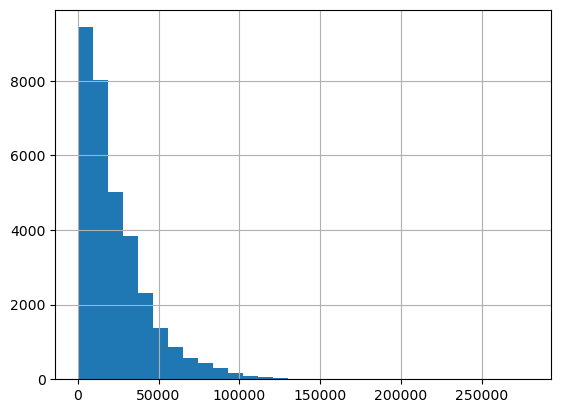

In [27]:
df['mileage'].hist(bins=30)

In [ ]:
# Boxplot para verificar outliers 

<Axes: >

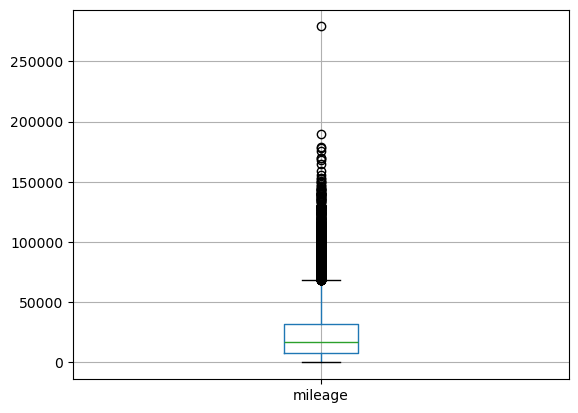

In [28]:
df.boxplot(column='mileage')

In [ ]:
#Verifica-se outliers positivos ( o que fazemos ) - tratamos estes outliers como uma nova variavel e trabalhamos separadamente ou transofrmamos os valores que estão muito acima ? tornar mais simétrica a distribuição 

In [ ]:
#Verificar correlação da variavel Milage com year 

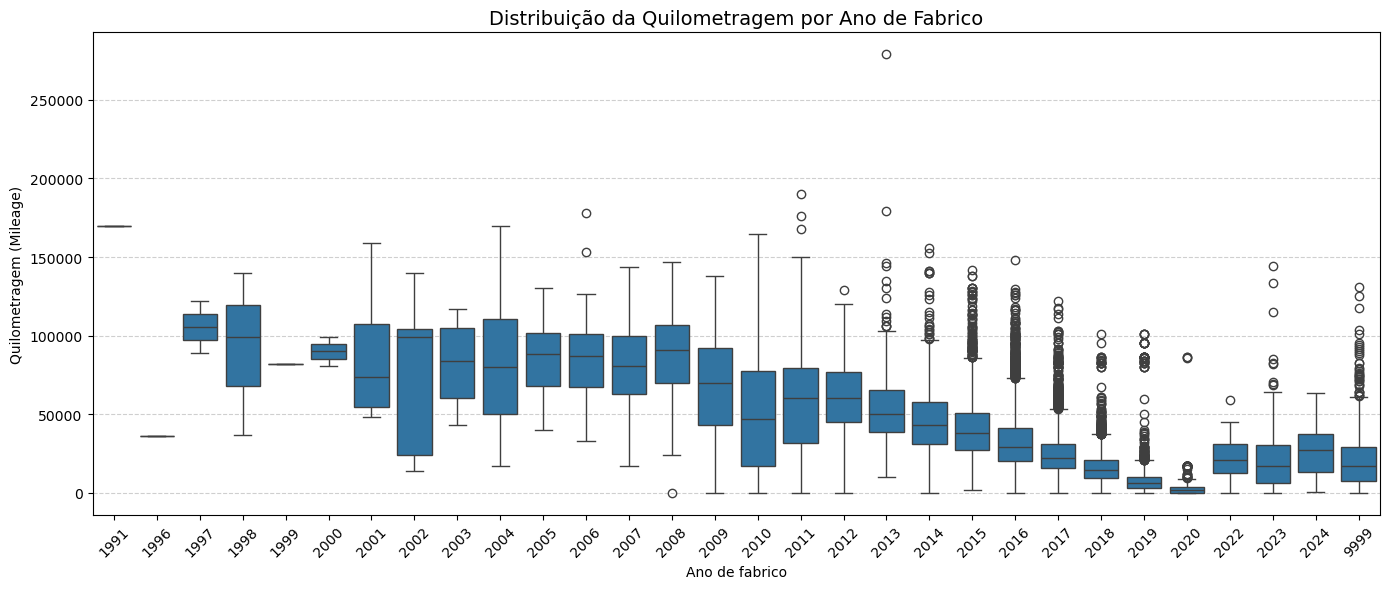

In [32]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='year', y='mileage')

plt.title('Distribuição da Quilometragem por Ano de Fabrico', fontsize=14)
plt.xlabel('Ano de fabrico')
plt.ylabel('Quilometragem (Mileage)')
plt.xticks(rotation=45)  # roda os anos no eixo x para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [33]:
df = df[df['year'] < 2035] # eliminar valor 9999 

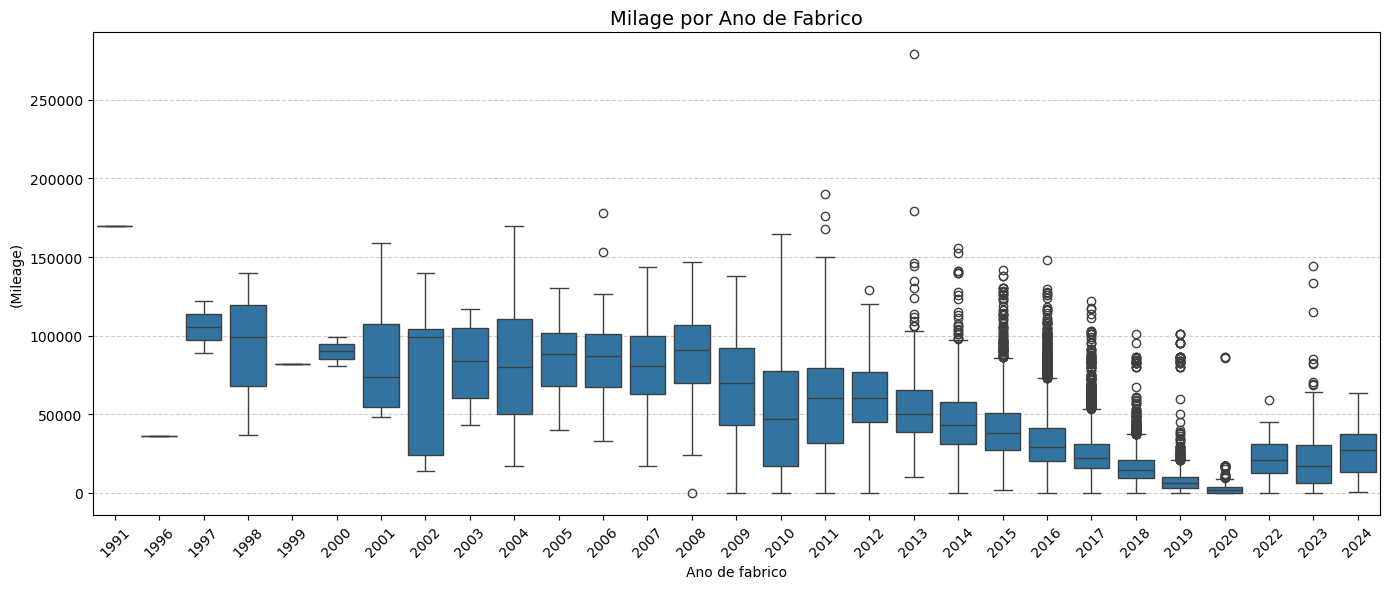

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='year', y='mileage')

plt.title('Milage por Ano de Fabrico', fontsize=14)
plt.xlabel('Ano de fabrico')
plt.ylabel('(Mileage)')
plt.xticks(rotation=45)  # roda os anos no eixo x para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### fuelType

In [63]:
df["fuelType"].unique()

array(['petrol', 'Petrol', 'Diesel', 'Diese', 'Hybrid', 'iesel', 'Petro',
       'etrol', 'DIESEL', nan, 'PETROL', 'diesel', 'Other', 'iese',
       'diese', 'etro', 'hybrid', 'petro', 'HYBRID', 'Hybri', 'ther',
       'ETROL', 'ybrid', 'IESEL', 'DIESE', 'PETRO', 'hybri', 'other',
       'Othe'], dtype=object)

In [64]:
# Normalizar (minúsculas + remover espaços)
df["fuelType"] = df["fuelType"].str.lower().str.strip()

# Mapeamento só com o que foi encontrado
fuel_map = {
    # Petrol
    "petrol": "Petrol", "petro": "Petrol", "etro": "Petrol","etrol": "Petrol",
    
    # Diesel
    "diesel": "Diesel", "diese": "Diesel", "iesel": "Diesel","iese": "Diesel",
    
    # Hybrid
    "hybrid": "Hybrid", "hybri": "Hybrid","ybrid": "Hybrid",
    
    # Electric
    "electric": "Electric",
    
    # Other
    "other": "Other", "othe": "Other", "ther": "Other"
}

# Aplicar mapeamento
df["fuelType"] = df["fuelType"].map(lambda x: fuel_map.get(x, x))

# Substituir NaN por "Unknown"
df["fuelType"] = df["fuelType"].fillna("Unknown")

# Ver categorias finais
print(df["fuelType"].unique())


['Petrol' 'Diesel' 'Hybrid' 'Unknown' 'Other']


In [ ]:
#Comparação dos diferentes tipos de combustivel por kms

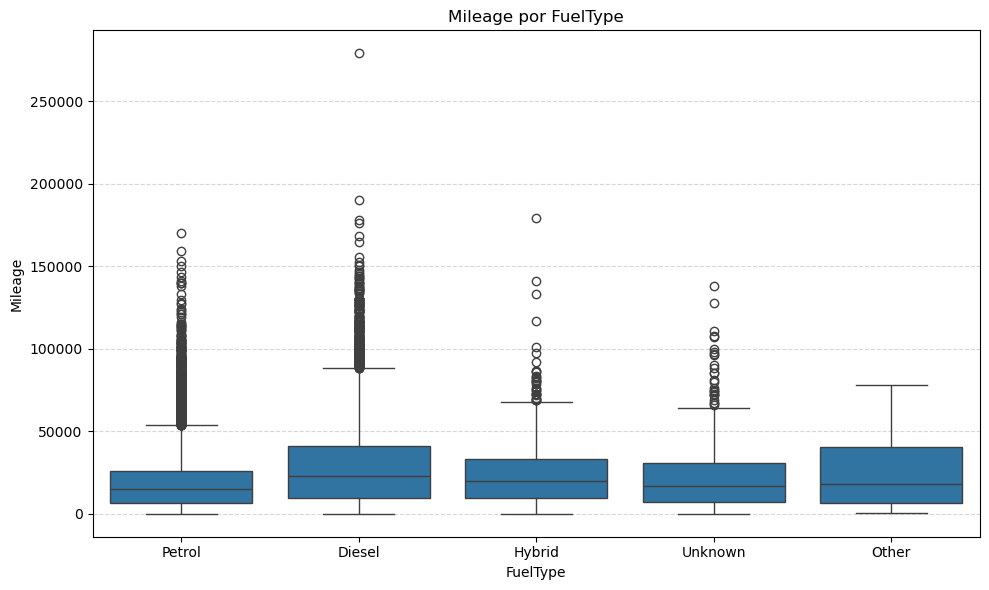

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fuelType', y='mileage')

plt.title('Mileage por FuelType')
plt.xlabel('FuelType')
plt.ylabel('Mileage')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#comprimir os valores de y com log para conseguirmos verificar melhor as diferenças dos outlieres

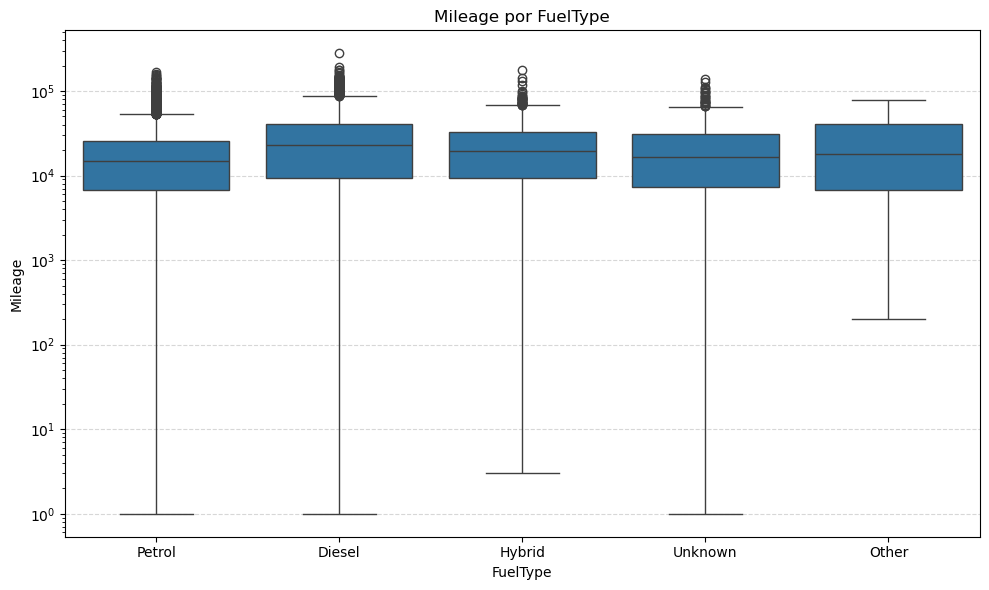

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fuelType', y='mileage')
plt.yscale('log')  #compressão dos outliers
plt.title('Mileage por FuelType')
plt.xlabel('FuelType')
plt.ylabel('Mileage')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#Comparar os diferentes tipos de combustivel com os anos- verificar a tendência - Vai complementar a analise com A MILEAGE 

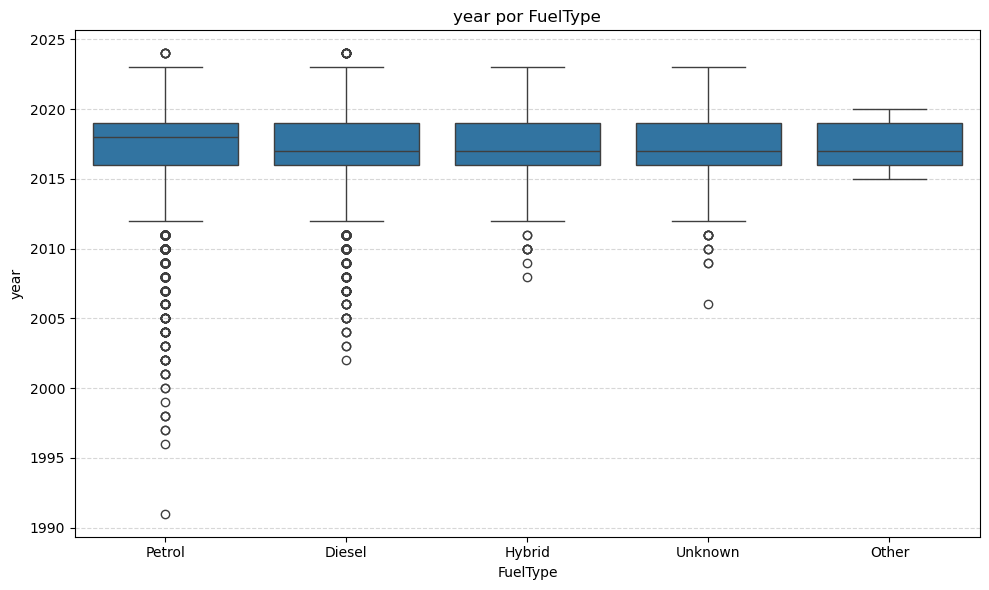

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fuelType', y='year')
plt.title('year por FuelType')
plt.xlabel('FuelType')
plt.ylabel('year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### tax

### mpg

In [36]:
df["mpg"].unique() #os MPG não pode ter valores Nan nem valores negativos e absurdos

array([41.5       , 38.2       , 51.4       , 44.1       , 65.7       ,
       58.9       , 47.9       , 64.2       , 62.8       , 61.4       ,
       94.78638042, 69.        , 39.8       , 30.4       , 39.2       ,
       30.1       , 53.3       , 54.3       , 40.9       , 67.3       ,
       50.4       , 68.9       , 76.3       , 49.6       , 42.2       ,
       86.        , 78.5       , 48.7       , 37.7       , 60.1       ,
       32.5       , 43.5       , 52.3       , 45.6       , 34.9       ,
       47.1       , 29.4       , 72.4       , 35.8       , 74.3       ,
       36.7       , 57.6       , 42.8       , 32.8       , 40.4       ,
       36.2       , 61.7       , 57.7       , 34.4       , 55.4       ,
       37.2       , 28.8       , 20.74549979, 56.5       , 43.        ,
       81.56893961, 31.7       , 32.1       , 67.        , 55.        ,
       46.3       , 70.6       , 24.6       , 31.4       , 44.8       ,
       33.6       , 66.        ,  9.42917895, 28.        , 58.  

In [37]:
print("Mínimo:", df["mpg"].min())
print("Máximo:", df["mpg"].max())
print("Média:", df["mpg"].mean())
print("Desvio padrão:", df["mpg"].std())

Mínimo: 0.3
Máximo: 94.786380415261
Média: 54.37457639412242
Desvio padrão: 11.174165649443083


In [38]:
# verificamos valores negativos de mpg que não pode ser e valores de 470 mpg que é muito alto

In [39]:
#trocar todos os negativos para nan etodos os valores acima de 100 também - por serem valores extremamente altos para rpm

In [40]:
num_missing = df["mpg"].isna().sum()
print(f"Número de valores ausentes: {num_missing}")

Número de valores ausentes: 0


In [41]:
df.loc[df["mpg"] < 0, "mpg"] = np.nan
df.loc[df["mpg"] > 100, "mpg"] = np.nan

In [42]:
num_missing = df["mpg"].isna().sum()
print(f"Número de valores ausentes: {num_missing}")

Número de valores ausentes: 0


In [43]:
#trocar os mesmos pela mediana, uma vez que temos valores muito distantes dos padroes como o 470 (valor máximo)

In [44]:
median_mpg = df["mpg"].median()
df.fillna({"mpg": median_mpg}, inplace=True)

In [45]:
print("Mínimo:", df["mpg"].min())
print("Máximo:", df["mpg"].max())
print("Média:", df["mpg"].mean())
print("Desvio padrão:", df["mpg"].std())

Mínimo: 0.3
Máximo: 94.786380415261
Média: 54.37457639412242
Desvio padrão: 11.174165649443083


In [ ]:
# Correlação MPG com Mileage - Eficiência do veiculo - Será que podemos comparar entre Diesel e Gasolina

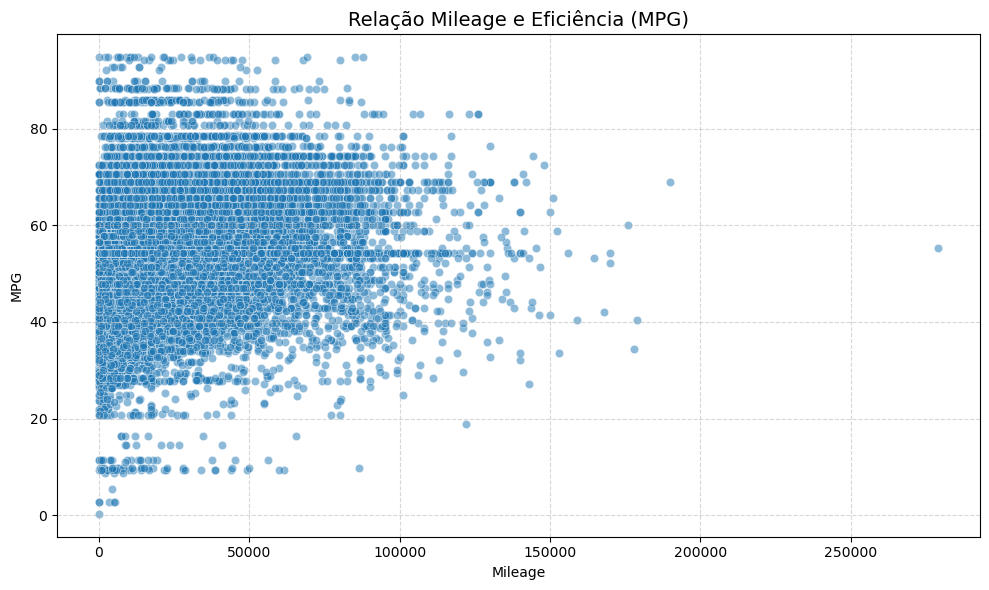

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='mileage', y='mpg', alpha=0.5)
plt.title('Relação Mileage e Eficiência (MPG)', fontsize=14)
plt.xlabel('Mileage')
plt.ylabel('MPG')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### engineSize

In [50]:
df["engineSize"].unique()

array([ 1.6       ,  2.        ,  1.5       ,  1.2       ,  1.        ,
               nan,  2.1       ,  3.        ,  2.8       ,  1.4       ,
        1.8       ,  2.3       ,  1.7       ,  2.98579344,  1.1       ,
        4.        ,  2.9       ,  1.3       ,  3.2       ,  2.06411863,
        2.2       ,  5.5       ,  3.82275785,  0.        , -0.1034928 ,
        0.19146242,  3.72371217,  0.31340658,  6.3       ,  2.5       ,
        0.18642488,  3.5       ,  2.4       ,  4.4       ,  3.73923548,
        0.16286595,  4.2       ,  0.30707394,  5.        ,  2.6631132 ,
        2.63120047,  5.2       ,  6.2       ,  0.7395339 ,  2.61964142,
        2.78177621,  0.15452932,  2.7       ,  1.9       ,  0.37112737,
        3.7       ,  4.7       ,  0.6       ,  5.4       ,  6.        ,
        6.6       ])

In [51]:
# a verificar os valores acima não pode haver valores nan, 0 e negativos para tamanhos do motor

In [52]:
invalid_values = df[(df["engineSize"].isna()) | (df["engineSize"] <= 0)]
print(invalid_values)

        carID     Brand      model  year transmission  mileage fuelType  \
7       95250  Mercedes    B Class  2017       Manual  14005.0   Diesel   
16      91709  Mercedes     M CLAS  2015    Automatic  68279.0   Diesel   
21      90923  Mercedes    C Class  2019    Automatic   6328.0   Petrol   
285     77254      Audi          Q  2010    Semi-Auto  17085.0   Petrol   
304    103046      Opel   Insignia  2017       Manual  26446.0   Diesel   
...       ...       ...        ...   ...          ...      ...      ...   
32335   89904   Hyundai        I40  2015       Manual  13268.0   Diesel   
32342  107249        VW         Up  2017       Manual  34604.0   Petrol   
32370   93841  Mercedes    E Class  2019    Semi-Auto  12542.0   Petrol   
32520  101524      Opel     Zafira  2016       Manual  20619.0   Petrol   
32540   99306    Toyota       Aygo  2017       Manual   8434.0   Petrol   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
7      145.0  65.7      

In [53]:
df = df[df["engineSize"] > 0] #remover todos os valores NaN, 0 e negativos 

In [54]:
print(df["engineSize"].unique())

[1.6        2.         1.5        1.2        1.         2.1
 3.         2.8        1.4        1.8        2.3        1.7
 2.98579344 1.1        4.         2.9        1.3        3.2
 2.06411863 2.2        5.5        3.82275785 0.19146242 3.72371217
 0.31340658 6.3        2.5        0.18642488 3.5        2.4
 4.4        3.73923548 0.16286595 4.2        0.30707394 5.
 2.6631132  2.63120047 5.2        6.2        0.7395339  2.61964142
 2.78177621 0.15452932 2.7        1.9        0.37112737 3.7
 4.7        0.6        5.4        6.         6.6       ]


In [55]:
#os valores postivos arredondar a uma casa decimal

In [56]:
df["engineSize"] = df["engineSize"].round(1)

In [57]:
print(df["engineSize"].unique())

[1.6 2.  1.5 1.2 1.  2.1 3.  2.8 1.4 1.8 2.3 1.7 1.1 4.  2.9 1.3 3.2 2.2
 5.5 3.8 0.2 3.7 0.3 6.3 2.5 3.5 2.4 4.4 4.2 5.  2.7 2.6 5.2 6.2 0.7 1.9
 0.4 4.7 0.6 5.4 6.  6.6]


In [58]:
print("Mínimo:", df["engineSize"].min())
print("Máximo:", df["engineSize"].max())

Mínimo: 0.2
Máximo: 6.6


In [59]:
### Removemos abaixo de 1 ?

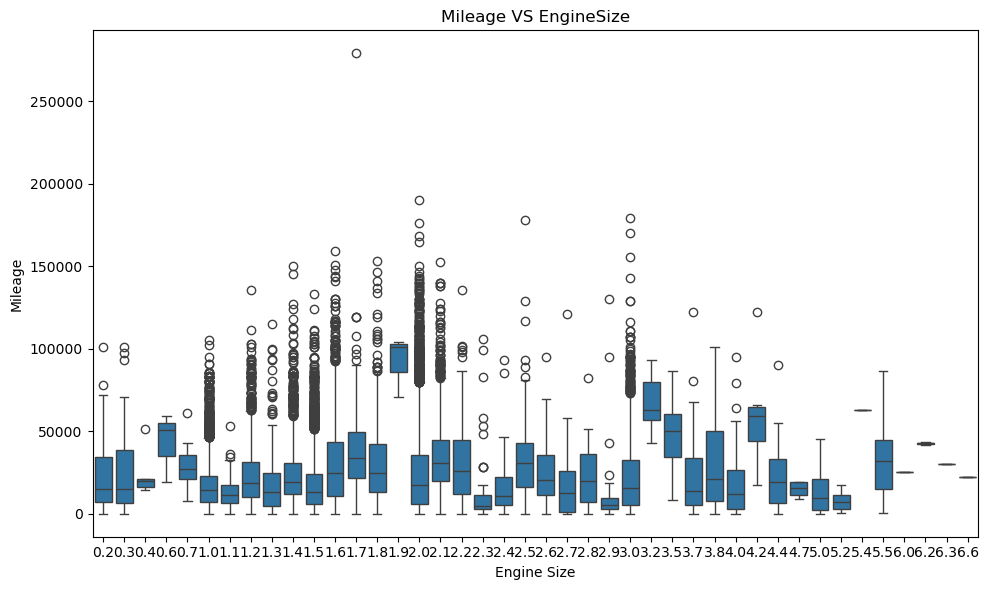

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='engineSize', y='mileage')
plt.title('Mileage VS EngineSize')
plt.xlabel('Engine Size')
plt.ylabel('Mileage')
plt.tight_layout()
plt.show()

### paintQuality%

In [134]:
df["paintQuality%"].unique()
#decidir o que fazer com os superior a 100. 1) truncar para 100. 2) apagar e preencher com a mediana 3)apagar e knn

array([ 61.        ,  60.        ,  94.        ,  77.        ,
        45.        ,  64.        ,  50.        ,  71.        ,
        99.        ,  73.        ,  78.        ,  40.        ,
        35.        ,  76.        ,  53.        ,  90.        ,
                nan,  42.        ,  70.        ,  75.        ,
        79.        ,  98.        ,  62.        ,  88.        ,
        59.        ,  97.        ,  85.        ,  89.        ,
        92.        ,  63.        ,  36.        ,  56.        ,
        54.        ,  52.        ,  66.        ,  80.        ,
        91.        ,  31.        ,  37.        ,  67.        ,
        30.        ,  84.        ,  69.        ,  55.        ,
        57.        ,  48.        ,  44.        ,  39.        ,
        82.        ,  34.        ,  33.        , 125.10995148,
         3.20741784,  65.        ,  86.        ,  74.        ,
       125.00377307,  87.        ,  72.        ,  93.        ,
        46.        ,  38.        ,  47.        ,  49.  

### previousOwners

In [135]:
df["previousOwners"].unique()

array([ 3.        ,  2.        ,  1.        ,  4.        ,  0.        ,
               nan, -2.34565   ,  6.25823052,  6.23017958,  6.25837066,
       -2.29943868,  6.21772443, -2.33512284,  6.2482512 ,  6.23308217,
       -2.33744529,  6.24583495,  6.24177863, -2.33936045, -2.31225953,
       -2.34030622, -2.31733109, -2.34010209,  6.22789796])

In [136]:
# Substituir NaN por 9999 (ou outro valor que prefiras, ex: 0)
df["previousOwners"] = df["previousOwners"].fillna(9999)

# Converter para inteiro
df["previousOwners"] = df["previousOwners"].astype(float).astype(int)

# Tornar valores negativos em positivos
df["previousOwners"] = df["previousOwners"].abs()

print(df["previousOwners"].unique())
print(df.dtypes)


[   3    2    1    4    0 9999    6]
Brand              object
model              object
year                int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners      int64
hasDamage         float64
dtype: object


### hasDamage

In [137]:
df["hasDamage"].unique()
#para apagar a variavel que nao tem nada de jeito

array([ 0., nan])

In [138]:
train["hasDamage"].unique()

array([ 0., nan])

In [ ]:
# fazer exploração da media 

In [142]:
train_0 = train[train["hasDamage"]== 0]
train_nan = train[~(train["hasDamage"] == 0)]


In [145]:
train_0["price"].median()

14698.0

In [146]:
train_nan["price"].median()

14798.0

In [ ]:
#como nao houve diferença na media então tiramos a variavel